In [1]:
import pandas as pd
import numpy as np

import sys

import pickle

from transformers import AutoConfig, AutoTokenizer, TFAutoModel
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

import metrics

from simpletransformers.language_representation import RepresentationModel

from TweetDataReport import datasplit, print_tweet_report, check_relevance_balance, datasplit_new

import time
import itertools
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from IPython.display import clear_output

import os
import re

from hyperopt import hp, fmin, tpe , pyll

In [2]:
print("Python Version:" + sys.version)
print("TensorFlow Version:", tf.__version__)
if tf.test.gpu_device_name():
    print("GPU is available")
else:
    print("GPU is NOT available")
print("CUDA Version:", tf.test.is_built_with_cuda())

Python Version:3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
TensorFlow Version: 2.10.0
GPU is available
CUDA Version: True


In [3]:
# file = 'data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-cased.pkl'

# with open(file, "rb") as file:
#     WF = pickle.load(file)

In [4]:
# print_tweet_report(WF)

In [5]:
# check_relevance_balance(WF)

In [4]:
language =  'italian'
#language =  'spanish'
#language =  'greek'

cleanings = ['00-dirty_dataset','01-basic_remover','02-basic_remover_without_stopwords','03-basic_remover_without_stopwords_with_stemming','04-twisted_remover_with_emoticons']

#case = 'bert'
#case = 'roberta'
case = 'gpt2'

 reps_models = ["dbmdz/bert-base-italian-uncased","dbmdz/bert-base-italian-cased","dbmdz/bert-base-italian-xxl-cased","dbmdz/bert-base-italian-xxl-uncased"]
# reps_models = ['osiria/roberta-base-italian']
# reps_models = ["GroNLP/gpt2-small-italian","GroNLP/gpt2-medium-italian-embeddings","GroNLP/gpt2-small-italian-embeddings"]

for combo in itertools.product(cleanings,reps_models):
    
    clear_output(wait=True)
    
    with open('data/'+ language +'/'+ combo[0] +'/data.pkl','rb') as file:
        WF = pickle.load(file)
    
    pretrained_model = RepresentationModel(model_type=case,model_name=combo[1],use_cuda=False) 
    sentence_vectors = pretrained_model.encode_sentences(WF['text'], combine_strategy="mean")
    sentence_vectors = np.split(sentence_vectors,sentence_vectors.shape[0])
    pandasseries = pd.Series(sentence_vectors)
    WF['reps'] = pandasseries.copy()
    data = pd.DataFrame()
    data['reps'] = WF['reps'].copy()
    data['relevance'] = WF['relevance'].copy()
    
    link = 'data/'+ language +'/'+ combo[0] +'/feature_extractions/'+case+'/'+ str(combo[1]).replace('/', '_')+'.pkl'
    
    print(link)
    
    with open(link , 'wb') as file:
        pickle.dump(data, file)

Some weights of GPT2ForTextRepresentation were not initialized from the model checkpoint at GroNLP/gpt2-small-italian-embeddings and are newly initialized: ['transformer.gpt2.h.3.mlp.c_proj.bias', 'transformer.gpt2.h.2.mlp.c_proj.weight', 'transformer.gpt2.h.3.ln_1.bias', 'transformer.gpt2.h.5.ln_2.bias', 'transformer.gpt2.h.0.attn.c_attn.bias', 'transformer.gpt2.h.4.mlp.c_proj.weight', 'transformer.gpt2.h.2.mlp.c_proj.bias', 'transformer.gpt2.h.11.ln_2.bias', 'transformer.gpt2.h.10.attn.c_proj.bias', 'transformer.gpt2.h.11.ln_2.weight', 'transformer.gpt2.h.8.mlp.c_fc.weight', 'transformer.gpt2.ln_f.weight', 'transformer.gpt2.h.8.attn.c_attn.bias', 'transformer.gpt2.h.3.attn.c_attn.bias', 'transformer.gpt2.h.11.attn.c_proj.weight', 'transformer.gpt2.h.8.attn.c_proj.weight', 'transformer.gpt2.h.4.attn.c_attn.weight', 'transformer.gpt2.h.4.ln_2.bias', 'transformer.gpt2.h.7.attn.c_proj.weight', 'transformer.gpt2.h.9.ln_2.bias', 'transformer.gpt2.h.3.attn.c_attn.weight', 'transformer.gpt2.

data/italian/04-twisted_remover_with_emoticons/feature_extractions/gpt2/GroNLP_gpt2-small-italian-embeddings.pkl


In [4]:
#language =  'italian'
language =  'spanish'
#language =  'greek'

cleanings = ['00-dirty_dataset','01-basic_remover','02-basic_remover_without_stopwords','03-basic_remover_without_stopwords_with_stemming','04-twisted_remover_with_emoticons']

#case = 'bert'
#case = 'roberta'
case = 'gpt2'

#reps_models = ["dccuchile/bert-base-spanish-wwm-uncased","dccuchile/bert-base-spanish-wwm-cased","Geotrend/bert-base-es-cased","dccuchile/tulio-chilean-spanish-bert","dccuchile/patana-chilean-spanish-bert"]
#reps_models = ["MMG/mlm-spanish-roberta-base","llange/xlm-roberta-large-spanish"]
reps_models = ["DeepESP/gpt2-spanish","datificate/gpt2-small-spanish","mrm8488/spanish-gpt2","DeepESP/gpt2-spanish-medium"]

for combo in itertools.product(cleanings,reps_models):
    
    clear_output(wait=True)
    
    with open('data/'+ language +'/'+ combo[0] +'/data.pkl','rb') as file:
        WF = pickle.load(file)
    
    pretrained_model = RepresentationModel(model_type=case,model_name=combo[1],use_cuda=False) 
    sentence_vectors = pretrained_model.encode_sentences(WF['text'], combine_strategy="mean")
    sentence_vectors = np.split(sentence_vectors,sentence_vectors.shape[0])
    pandasseries = pd.Series(sentence_vectors)
    WF['reps'] = pandasseries.copy()
    data = pd.DataFrame()
    data['reps'] = WF['reps'].copy()
    data['relevance'] = WF['relevance'].copy()

    link = 'data/'+ language +'/'+ combo[0] +'/feature_extractions/'+case+'/'+ str(combo[1]).replace('/', '_')+'.pkl'
    
    print(link)
    
    with open(link , 'wb') as file:
        pickle.dump(data, file)

Some weights of GPT2ForTextRepresentation were not initialized from the model checkpoint at DeepESP/gpt2-spanish-medium and are newly initialized: ['transformer.gpt2.h.23.ln_2.weight', 'transformer.gpt2.h.19.attn.c_proj.bias', 'transformer.gpt2.h.3.mlp.c_fc.bias', 'transformer.gpt2.wpe.weight', 'transformer.gpt2.h.0.attn.c_attn.weight', 'transformer.gpt2.h.9.mlp.c_proj.bias', 'transformer.gpt2.h.13.attn.c_proj.weight', 'transformer.gpt2.wte.weight', 'transformer.gpt2.h.7.mlp.c_proj.weight', 'transformer.gpt2.h.18.attn.c_proj.weight', 'transformer.gpt2.h.2.ln_2.bias', 'transformer.gpt2.h.2.attn.c_proj.weight', 'transformer.gpt2.h.17.attn.c_proj.weight', 'transformer.gpt2.h.23.ln_1.bias', 'transformer.gpt2.h.6.attn.c_proj.weight', 'transformer.gpt2.h.7.mlp.c_fc.weight', 'transformer.gpt2.h.18.attn.c_attn.bias', 'transformer.gpt2.h.12.attn.c_attn.weight', 'transformer.gpt2.h.10.mlp.c_proj.bias', 'transformer.gpt2.h.12.mlp.c_proj.weight', 'transformer.gpt2.h.18.attn.c_proj.bias', 'transfor

data/spanish/04-twisted_remover_with_emoticons/feature_extractions/gpt2/DeepESP_gpt2-spanish-medium.pkl


In [9]:
#language =  'italian'
#language =  'spanish'
language =  'greek'

cleanings = ['00-dirty_dataset','01-basic_remover','02-basic_remover_without_stopwords','03-basic_remover_without_stopwords_with_stemming','04-twisted_remover_with_emoticons']

#model_type = 'bert'
#case = 'roberta'
model_type = 'gpt2'

#reps_models = ["Geotrend/bert-base-el-cased","nlpaueb/bert-base-greek-uncased-v1","dimitriz/st-greek-media-bert-base-uncased","petros/bert-base-cypriot-uncased-v1"]
reps_models = ["lighteternal/gpt2-finetuned-greek-small","lighteternal/gpt2-finetuned-greek","nikokons/gpt2-greek","ClassCat/gpt2-small-greek-v2"]

for combo in itertools.product(cleanings,reps_models):
    
    clear_output(wait=True)
    
    with open('data/'+ language +'/'+ combo[0] +'/data.pkl','rb') as file:
        WF = pickle.load(file)
    
    pretrained_model = RepresentationModel(model_type=model_type,model_name=combo[1],use_cuda=False) 
    sentence_vectors = pretrained_model.encode_sentences(WF['text'], combine_strategy="mean")
    sentence_vectors = np.split(sentence_vectors,sentence_vectors.shape[0])
    pandasseries = pd.Series(sentence_vectors)
    WF['reps'] = pandasseries.copy()
    data = pd.DataFrame()
    data['reps'] = WF['reps'].copy()
    data['relevance'] = WF['relevance'].copy()
    
    link = 'data/'+ language +'/'+ combo[0] +'/feature_extractions/'+model_type+'/'+ str(combo[1]).replace('/', '_')+'.pkl'
    
    print(link)
    
    with open(link , 'wb') as file:
        pickle.dump(data, file)

Some weights of GPT2ForTextRepresentation were not initialized from the model checkpoint at ClassCat/gpt2-small-greek-v2 and are newly initialized: ['transformer.gpt2.h.3.mlp.c_fc.bias', 'transformer.gpt2.wpe.weight', 'transformer.gpt2.h.0.attn.c_attn.weight', 'transformer.gpt2.wte.weight', 'transformer.gpt2.h.7.mlp.c_proj.weight', 'transformer.gpt2.h.2.ln_2.bias', 'transformer.gpt2.h.2.attn.c_proj.weight', 'transformer.gpt2.h.6.attn.c_proj.weight', 'transformer.gpt2.h.7.mlp.c_fc.weight', 'transformer.gpt2.h.5.attn.c_proj.bias', 'transformer.gpt2.h.0.attn.c_proj.bias', 'transformer.gpt2.h.7.ln_1.bias', 'transformer.gpt2.h.7.ln_2.bias', 'transformer.gpt2.h.2.ln_1.bias', 'transformer.gpt2.h.0.mlp.c_proj.bias', 'transformer.gpt2.h.0.ln_1.bias', 'transformer.gpt2.h.4.ln_1.weight', 'transformer.gpt2.h.0.ln_1.weight', 'transformer.gpt2.h.1.attn.c_attn.weight', 'transformer.gpt2.h.6.mlp.c_proj.weight', 'transformer.gpt2.h.2.attn.c_proj.bias', 'transformer.gpt2.h.3.attn.c_proj.weight', 'transf

data/greek/04-twisted_remover_with_emoticons/feature_extractions/gpt2/ClassCat_gpt2-small-greek-v2.pkl


## POST PROCESSING HYPER TUNING

In [5]:
# I just change the combinations of language and model_type

language =  'italian'
#language =  'spanish'
#language =  'greek'

cleanings = ['00-dirty_dataset','01-basic_remover','02-basic_remover_without_stopwords','03-basic_remover_without_stopwords_with_stemming','04-twisted_remover_with_emoticons']

model_type = 'bert'
# ase = 'roberta' didn't manage to get representations yet
#case = 'gpt-2' probably the code needs reformation

data_files = []

for cleaning in cleanings:
    path = 'data/'+ language +'/'+ cleaning + '/feature_extractions/' + model_type
    for x in os.listdir(path):
        file = path + '/' + x
        data_files.append(file)
data_files

['data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-cased.pkl',
 'data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-uncased.pkl',
 'data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-xxl-cased.pkl',
 'data/italian/00-dirty_dataset/feature_extractions/bert/dbmdz_bert-base-italian-xxl-uncased.pkl',
 'data/italian/01-basic_remover/feature_extractions/bert/dbmdz_bert-base-italian-cased.pkl',
 'data/italian/01-basic_remover/feature_extractions/bert/dbmdz_bert-base-italian-uncased.pkl',
 'data/italian/01-basic_remover/feature_extractions/bert/dbmdz_bert-base-italian-xxl-cased.pkl',
 'data/italian/01-basic_remover/feature_extractions/bert/dbmdz_bert-base-italian-xxl-uncased.pkl',
 'data/italian/02-basic_remover_without_stopwords/feature_extractions/bert/dbmdz_bert-base-italian-cased.pkl',
 'data/italian/02-basic_remover_without_stopwords/feature_extractions/bert/dbmdz_bert-base-italian-uncased.pkl',
 'data/i

In [6]:
# for file in data_files:
#     with open(file, "rb") as file:
#         WF = pickle.load(file)
#     print(print_tweet_report(WF))
#     print(check_relevance_balance(WF))

# MODELIZE AND HYPERTUNE(n dense post layers with 768 + one dropout):

In [8]:
def binary_classification_representation_based_transfer_learning(calibrers,WF):  
    
    hyperparameters = {
                   'ITERATIONS':'15',
                   'EPOCHS': '50',
                   'LOSS':"'binary_crossentropy'",
                   'OPTIMIZER': """Adam(learning_rate=calibrers['learning_rate'])""",
                   'METRICS': """['acc', metrics.precision, metrics.recall, metrics.f1]""",
                   'BATCH_SIZE': """calibrers['batch_size']""",
                   'TEST_SIZE': '0.3',
                   'RELOVIR': """calibrers['relovir']"""}
    
    for key, value in hyperparameters.items():
        globals()[key] = eval(value)
    
    av_loss_train = np.zeros(EPOCHS)
    av_loss_val = np.zeros(EPOCHS)
    av_acc_train = np.zeros(EPOCHS)
    av_acc_val = np.zeros(EPOCHS)
    av_prec_train = np.zeros(EPOCHS)
    av_prec_val = np.zeros(EPOCHS)
    av_rec_train = np.zeros(EPOCHS)
    av_rec_val = np.zeros(EPOCHS)
    av_f1_train = np.zeros(EPOCHS)
    av_f1_val = np.zeros(EPOCHS)
    
    fit_time = 0
    
    for iteration in range(ITERATIONS):

        training_set_X, test_set_X, training_set_y, test_set_y = datasplit_new(WF,0.3,relovir = RELOVIR)
        
        model = None
    
        #np.random.seed(SEED)
    
        #initializer choice
    
        model = Sequential()
        
        model.add(Input(shape = (768,)))
        
        for layers in range(int(calibrers['numberofpostlayers'])):
            model.add(Dense(768,activation='relu'))
        
        model.add(Dropout(calibrers['dropout_rate']))     
        
        model.add(Dense(1,activation = calibrers['PrePredictionActivation']))
        
        model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)
    
        #print(type(model.summary()))
              
        clear_output(wait=True)
        print(f'iteration {iteration-1} took {iter_time} s or {iter_time/60} min')
        
        start_time = time.time()
        
        history = model.fit(training_set_X, training_set_y,validation_data=( test_set_X,  test_set_y), batch_size = int(BATCH_SIZE), epochs = EPOCHS, verbose = 0,callbacks=[],shuffle = True)
        
        end_time = time.time()
        
        fit_time += end_time-start_time
    
        #training metrics
        av_loss_train = np.add(av_loss_train,np.array(history.history['loss']))
        av_acc_train = np.add(av_acc_train,np.array(history.history['acc']))
        av_prec_train = np.add(av_prec_train,np.array(history.history['precision']))
        av_rec_train = np.add(av_rec_train,np.array(history.history['recall']))
        av_f1_train = np.add(av_f1_train,np.array(history.history['f1']))
        #validation metrics
        av_loss_val = np.add(av_loss_val,np.array(history.history['val_loss']))
        av_acc_val = np.add(av_acc_val,np.array(history.history['val_acc']))
        av_prec_val = np.add(av_prec_val,np.array(history.history['val_precision']))
        av_rec_val = np.add(av_rec_val,np.array(history.history['val_recall']))
        av_f1_val = np.add(av_f1_val,np.array(history.history['val_f1']))
    
    
    av_loss_train = np.divide(av_loss_train,ITERATIONS)
    av_acc_train = np.divide(av_acc_train,ITERATIONS)
    av_prec_train = np.divide(av_prec_train,ITERATIONS)
    av_rec_train = np.divide(av_rec_train,ITERATIONS)
    av_f1_train = np.divide(av_f1_train,ITERATIONS)

    av_loss_val = np.divide(av_loss_val,ITERATIONS)
    av_acc_val = np.divide(av_acc_val,ITERATIONS)
    av_prec_val = np.divide(av_prec_val,ITERATIONS)
    av_rec_val = np.divide(av_rec_val,ITERATIONS)
    av_f1_val = np.divide(av_f1_val,ITERATIONS)
    
    clear_output(wait=True)

    results = pd.DataFrame({'train_loss': av_loss_train,'train_acc': av_acc_train,'train_prec': av_prec_train,'train_rec': av_rec_train,'train_f1': av_f1_train,'val_loss': av_loss_val,'val_acc': av_acc_val,'val_prec': av_prec_val,'val_rec': av_rec_val,'val_f1': av_f1_val})
    
    path = "runs"
    dirs = os.listdir(path)
    dirs.sort(reverse = True)
    the_run = dirs[0]
    match = re.search(r"run\d{5}", the_run)[0][3:]
    match = f'{(int(match)+1):05}'
    the_folder = f"run{match}"
    directory = os.path.join(path, the_folder)
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Directory {the_folder} created!")
    else:
        print("Directory already exists.")
    
    #####################
    # now save the results pickle and the hyperparameter text in the correct run folder
    filepath = f"runs" +f"/{the_folder}"
    sub_dir1 = os.path.join(filepath,'results.plk')
    sub_dir2 = os.path.join(filepath,"hyperparameters.txt")
    sub_dir3 = os.path.join(filepath,'other_info')
    with open(sub_dir1, 'wb') as dummy:
        pickle.dump(results, dummy)
        
    hyperparameters = {
                   'ITERATIONS':'5',
                   'EPOCHS': '50',
                   'LOSS':"'binary_crossentropy'",
                   'OPTIMIZER': 'Adam(learning_rate=0.0001)',
                   'METRICS': """['acc', metrics.precision, metrics.recall, metrics.f1]""",
                   'BATCH_SIZE': BATCH_SIZE,
                   'TEST_SIZE': '0.3',
                   'RELOVIR': RELOVIR }
    
    
    with open(sub_dir2, 'w') as file:
        for key in hyperparameters:
            file.write('\n '+ key + ':' + str(hyperparameters[key]) + '\n')
            #file.write(file)
            
    with open(sub_dir3, 'w') as file:
        file.write(f'{file} : {fit_time/ITERATIONS}')
            
    # txt with the n maximum val_f1 epochs and their values
    n=10
    if EPOCHS<n:
        n = 1
    sub_dir3 = os.path.join(filepath,"val_f1.txt")
    x = list(results['val_f1'].nlargest(n).index)
    print(x)
    nums = list(map(lambda x: round(results['val_f1'].loc[x],4),x))
    print(nums)
    text = 'epoch value\n'
    for i in range(n):
        text+=f'-{(x[i]):03}- {nums[i]}\n'
    with open(sub_dir3, 'wb') as dummy:
        dummy.write(text.encode())
        
    #####################
    # now save the plot pictures(not particularly usefull in the general code)
    plt.plot(results['val_acc'])
    plt.plot(results['val_prec'])
    plt.plot(results['val_rec'])
    plt.plot(results['val_f1'])
    plt.title('Average Evaluation Model Metrics')
    plt.ylabel('Value')
    plt.xlabel('Epoch')
    plt.legend(['accuracy','precision','recall','f1-score'], loc='lower right')#, bbox_to_anchor=(1, 0.5))
    plt.savefig(f'runs/{the_folder}/AEMM.jpg',dpi = 300)
    plt.show()
    
    ######################
    # save model summary
    with open(f'runs/{the_folder}/model_summary.txt', 'w') as f:
        model.summary(print_fn=lambda x: f.write(x + '\n'))

    print(results)
    
    av_f1_val = np.add(av_f1_val,np.array(history.history['val_f1']))
 
    return -np.max(np.divide(av_f1_val,ITERATIONS))

In [7]:
hyperspace = {
    'dropout_rate': hp.uniform('dropout_rate', 0.1, 0.5),
    'numberofpostlayers': hp.quniform('postlayersnumbers',3,15,q=1),
    'relovir': hp.uniform('relovir', 0.2, 0.5),
    'learning_rate': hp.uniform('learning_rate',0.0000001,0.001),
    'batch_size' : hp.quniform('batch_size',20,140,q=5),
    'PrePredictionActivation':hp.choice('PrePredictionActivation',['softmax','sigmoid'])
     }

Directory run00078 created!                                                        
[49, 47, 44, 48, 46, 45, 40, 36, 41, 43]                                           
[0.1764, 0.1761, 0.176, 0.176, 0.1754, 0.1753, 0.1748, 0.1746, 0.1743, 0.1742]     
 50%|█████     | 1/2 [08:53<05:05, 305.23s/trial, best loss: -0.003929039902157254]

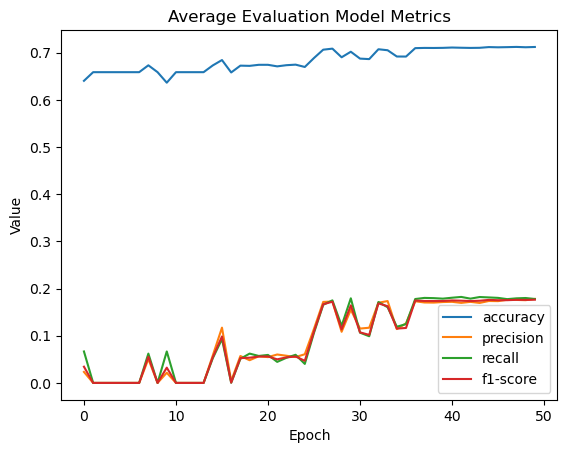

    train_loss  train_acc  train_prec  train_rec  train_f1  val_loss  \            
0    43.071071   0.687345    0.019294   0.042760  0.023544  6.254287   
1     1.853271   0.695375    0.019058   0.029487  0.015210  0.695373   
2     6.611256   0.691428    0.012005   0.037103  0.017725  0.989245   
3     0.629549   0.702661    0.004826   0.012500  0.006866  0.792300   
4     0.629655   0.701113    0.003160   0.009325  0.004521  0.647392   
5     1.867820   0.703453    0.000990   0.004167  0.001599  0.646776   
6     0.621721   0.705016    0.011001   0.009095  0.007844  0.646568   
7     0.607024   0.704902    0.009205   0.009195  0.007932  0.648297   
8     0.608399   0.706523    0.007167   0.004614  0.004559  0.645889   
9     0.609575   0.710444    0.022224   0.018267  0.018240  0.670270   
10    0.610289   0.704004    0.001157   0.003968  0.001792  0.645899   
11    0.607801   0.705717    0.000000   0.000000  0.000000  0.646246   
12    0.606777   0.705717    0.000000   0.000000  0.

In [12]:
for file in data_files:
    with open(file, "rb") as file:
        WF = pickle.load(file)
    best = fmin(fn=modelize, space=hyperspace, algo=tpe.suggest, max_evals=2) #i use WF and file in here but it works weirdly :P
    total_time = end_time-start_time
    print(f'{file} : {total_time}')